# Mushroom Hunting
Lab Assignment One: Exploring Table Data

**_Jake Oien, Seung Ki Lee, Jenn Le_**

## Business Understanding

This data can be useful in identifying trends in poisonous mushrooms and assist in the classification of unknown mushrooms.

Dataset Source: https://www.kaggle.com/uciml/mushroom-classification

## Data Understanding

In [78]:
import pandas as pd
import numpy as np

df = pd.read_csv('./mushrooms.csv')
df.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


### Data Value Replacements

This data is extremely confusing since we don't inherently know what any of the labels mean. In order to make it more intuitive, we replace the labels with more meaningful values, descriptive labels or variable representations where it makes sense.

The main point of this dataset is to classify whether or not a mushroom is possibly poisonous. To make this point clear, we change the class values from "e" and "p" to a binary value of either 0 or 1. We use the same binary value to indicate whether or not a mushroom has bruises. For number of rings, we replace the letters with the numerical value of the number of rings. Every other value is replaced with its descriptive label to make the data easier to read. We also changed the column names to snake case to be more in line with naming conventions.

In [79]:
# Changing column names
for col_name, col in df.iteritems():
    df.rename(columns={col_name:col_name.replace('-', '_')}, inplace=True)

# Replacing data values, also shows the possible values for each attribute
df["class"].replace(to_replace=['e', 'p'],
                     value=[0, 1], inplace=True)

df.cap_shape.replace(to_replace=['b', 'c', 'x', 'f', 'k', 's'],
                     value=["bell", "conical", "convex", "flat", "knobbed", "sunken"],
                     inplace=True)

df.cap_surface.replace(to_replace=['f', 'g', 'y', 's'],
                     value=["fibrous", "grooves", "scaly", "smooth"], 
                     inplace=True)

df.cap_color.replace(to_replace=['n', 'b', 'c', 'g', 'r', 'p', 'u', 'e', 'w', 'y'],
                     value=["brown", "buff", "cinnamon", "gray", "green", "pink", 
                            "purple", "red", "white", "yellow"], 
                     inplace=True)

df.bruises.replace(to_replace=['f', 't'],
                     value=[0, 1], 
                     inplace=True)

df.odor.replace(to_replace=['a', 'l', 'c', 'y', 'f', 'm', 'n', 'p', 's'],
                     value=["almond", "anise", "creosote", "fishy", "foul", 
                            "musty", "none", "pungent", "spicy"], 
                     inplace=True)

df.gill_attachment.replace(to_replace=['a', 'd', 'f', 'n'],
                     value=["attached", "descending", "free", "notched"], 
                     inplace=True)

df.gill_spacing.replace(to_replace=['c', 'w', 'd'],
                     value=["close", "crowded", "distant"], 
                     inplace=True)

df.gill_size.replace(to_replace=['b', 'n'],
                     value=["broad", "narrow"], 
                     inplace=True)

df.gill_color.replace(to_replace=['k', 'n', 'b', 'h', 'g', 'r', 'o', 
                                  'p', 'u', 'e', 'w', 'y'],
                     value=["black", "brown", "buff", "chocolate", "gray", 
                            "green", "orange", "pink", "purple", "red", "white", "yellow"], 
                     inplace=True)

df.stalk_shape.replace(to_replace=['e', 't'],
                     value=["enlarging", "tapering"], 
                     inplace=True)

df.stalk_root.replace(to_replace=['b', 'c', 'u', 'e', 'z', 'r', '?'],
                     value=["bulbous", "club", "cup", "equal", "rhizomorphs", 
                            "rooted", "missing"], 
                     inplace=True)

df.stalk_surface_above_ring.replace(to_replace=['f', 'y', 'k', 's'],
                     value=["fibrous", "scaly", "silky", "smooth"], 
                     inplace=True)

df.stalk_surface_below_ring.replace(to_replace=['f', 'y', 'k', 's'],
                     value=["fibrous", "scaly", "silky", "smooth"], 
                     inplace=True)

df.stalk_color_above_ring.replace(to_replace=['n', 'b', 'c', 'g', 'o', 'p', 'e', 'w', 'y'],
                     value=["brown", "buff", "cinnamon", "gray", "orange", 
                            "pink", "red", "white", "yellow"], 
                     inplace=True)

df.stalk_color_below_ring.replace(to_replace=['n', 'b', 'c', 'g', 'o', 'p', 'e', 'w', 'y'],
                     value=["brown", "buff", "cinnamon", "gray", "orange", 
                            "pink", "red", "white", "yellow"], 
                     inplace=True)

df.veil_type.replace(to_replace=['p', 'u'],
                     value=["partial", "universal"], 
                     inplace=True)

df.veil_color.replace(to_replace=['n', 'o', 'w', 'y'],
                     value=["brown", "orange", "white", "yellow"], inplace=True)

df.ring_number.replace(to_replace=['n', 'o', 't'],
                     value=[0, 1, 2], inplace=True)

df.ring_type.replace(to_replace=['c', 'e', 'f', 'l', 'n', 'p', 's', 'z'],
                     value=["cobwebby", "evanescent", "flaring", "large", 
                            "none", "pendant", "sheathing", "zone"], 
                     inplace=True)

df.spore_print_color.replace(to_replace=['k', 'n', 'b', 'h', 'r', 'o', 'u', 'w', 'y'],
                     value=["black", "brown", "buff", "chocolate", "green", 
                            "orange", "purple", "white", "yellow"], 
                     inplace=True)

df.population.replace(to_replace=['a', 'c', 'n', 's', 'v', 'y'],
                     value=["abundant", "clustered", "numerous", "scattered", 
                            "several", "solitary"], 
                     inplace=True)

df.habitat.replace(to_replace=['g', 'l', 'm', 'p', 'u', 'w', 'd'],
                     value=["grasses", "leaves", "meadows", "paths", "urban", 
                            "waste", "woods"], 
                     inplace=True)

df.head()

,class,cap_shape,cap_surface,cap_color,bruises,odor,gill_attachment,gill_spacing,gill_size,gill_color,...,stalk_surface_below_ring,stalk_color_above_ring,stalk_color_below_ring,veil_type,veil_color,ring_number,ring_type,spore_print_color,population,habitat
0,1,convex,smooth,brown,1,pungent,free,close,narrow,black,...,smooth,white,white,partial,white,1,pendant,black,scattered,urban
1,0,convex,smooth,yellow,1,almond,free,close,broad,black,...,smooth,white,white,partial,white,1,pendant,brown,numerous,grasses
2,0,bell,smooth,white,1,anise,free,close,broad,brown,...,smooth,white,white,partial,white,1,pendant,brown,numerous,meadows
3,1,convex,scaly,white,1,pungent,free,close,narrow,brown,...,smooth,white,white,partial,white,1,pendant,black,scattered,urban
4,0,convex,smooth,gray,0,none,free,crowded,broad,black,...,smooth,white,white,partial,white,1,evanescent,brown,abundant,grasses


In [80]:
# Show the data types
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8124 entries, 0 to 8123
Data columns (total 23 columns):
class                       8124 non-null int64
cap_shape                   8124 non-null object
cap_surface                 8124 non-null object
cap_color                   8124 non-null object
bruises                     8124 non-null int64
odor                        8124 non-null object
gill_attachment             8124 non-null object
gill_spacing                8124 non-null object
gill_size                   8124 non-null object
gill_color                  8124 non-null object
stalk_shape                 8124 non-null object
stalk_root                  8124 non-null object
stalk_surface_above_ring    8124 non-null object
stalk_surface_below_ring    8124 non-null object
stalk_color_above_ring      8124 non-null object
stalk_color_below_ring      8124 non-null object
veil_type                   8124 non-null object
veil_color                  8124 non-null object
ring_number  

Most of the attributes are sensory descriptors so we store them as objects in the pandas dataframe. The only attributes that are stored as numerical values are those such as "poisonous" which has a binary value or those such as "ring_number" which would have an ordinal value.

Besides "ring_number", which is ordinal, all of the attributes in our data are nominal. They're either categorical or binary. 

In [81]:
# Percentage of possibly poisonous mushrooms in the dataset
sum(df["class"]==1)/len(df)*100.0

48.202855736090591

## Data Visualization

### Single Attribute Analysis

When it comes to plants and animals, poisonous ones can usually be identified by their color or odor so we'll first take a look at those to see if our data reflects that at all.

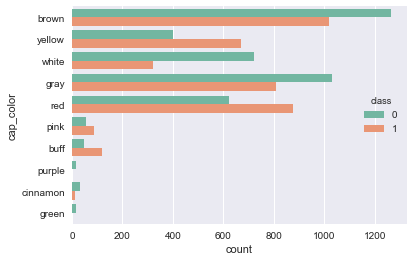

In [82]:
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

sns.countplot(y=df.cap_color, hue=df["class"], palette="Set2")

In [83]:
# Grouping by odor and seeing the percentage of poisonous mushrooms
df_grouped_odor = df.groupby(by='odor')
print('---------------------------------------')
print('Poison by Odor:')
print(df_grouped_odor["class"].sum() / df_grouped_odor["class"].count())

---------------------------------------
Poison by Odor:
odor
almond      0.000000
anise       0.000000
creosote    1.000000
fishy       1.000000
foul        1.000000
musty       1.000000
none        0.034014
pungent     1.000000
spicy       1.000000
Name: class, dtype: float64


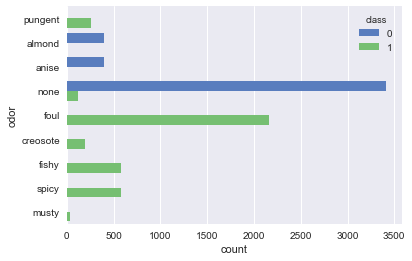

In [84]:
sns.countplot(y=df.odor, hue=df["class"], palette="muted")

From this data, we can tell that odor is a much better indicator of poison than color. According to our data, a mushroom that has an odor other than almond or anise is definitely poisonous. Besides "musty", the sizes of each odor group is fairly considerable and with a 100% rate in all but the "none" group, odor is definitely a factor that can't be ignored. On the other hand, the color doesn't seem to be a clear indicator of poison, as all of the color groups have a good amount of both edible and poisonous mushrooms, or just don't have enough instances for us to be sure.

#### Environment

Population, habitat, and bruises are attributes that tell us more about the type of conditions the mushroom can be found in. We'll take a look at the distributions of each of these attributes to see if one is a good indication of poison.

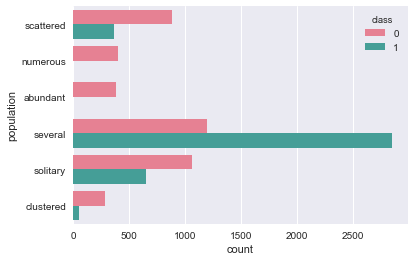

In [85]:
sns.countplot(y=df.population, hue=df["class"], palette="husl")

It seems like with "numerous", "abundant", and "clustered", there is a high chance of the mushroom not being poisonous. It could be argued that these labels are ambiguous and so don't make for the best attributes, however, the only labels that really are ambiguous are "numerous" and "abundant", both of which have a 100% edible rate in our data. According to this data, poisonous mushrooms are typically found alone or in a smaller group, usually scattered rather than clustered.

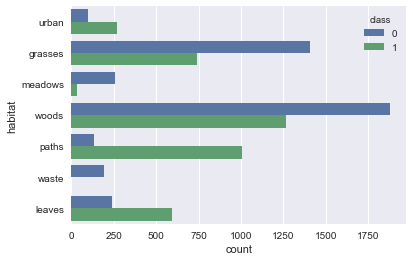

In [86]:
sns.countplot(y=df.habitat, hue=df["class"])

From the habitat distribution, it seems to be that poisonous mushrooms are more likely to be found in urban settings and on paths rather than meadows or waste. The other attributes have poison rates close to 50% so they aren't very meaningful alone, even though there are fairly clear distinctions on whether the particular envrionment favors edible or poisonous mushrooms.

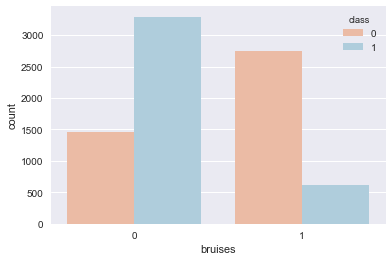

In [88]:
sns.countplot(df.bruises, hue=df["class"], palette="RdBu")

The last of our envrionment attributes, bruises, shows that mushrooms without bruises are more likely to be poisonous while mushrooms with bruises are more likely to be edible. This can indicate that poisonous mushrooms are tougher than edible ones. Adding to this dataset attributes such as elasticity or texture might make it more accurate.

Since "ring_number" is our only non-nominal attribute, let's also take a look at that.

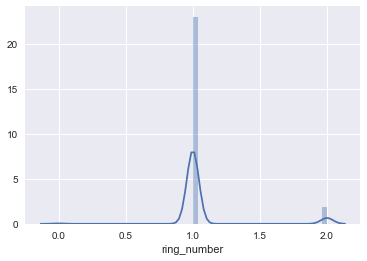

In [94]:
sns.distplot(df.ring_number)

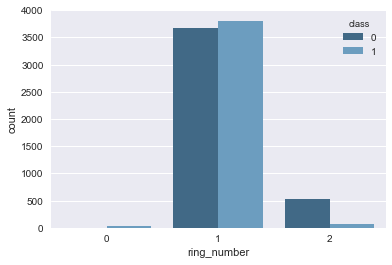

In [93]:
sns.countplot(df.ring_number, hue=df["class"], palette="Blues_d")

In [91]:
# Grouping by odor and seeing the percentage of poisonous mushrooms
df_grouped_ring_num = df.groupby(by='ring_number')
print('---------------------------------------')
print('Poison by Ring Number:')
print(df_grouped_ring_num["class"].sum() / df_grouped_ring_num["class"].count())

---------------------------------------
Poison by Ring Number:
ring_number
0    1.000000
1    0.508547
2    0.120000
Name: class, dtype: float64


In [92]:
df_grouped_ring_num["class"].count()

ring_number
0      36
1    7488
2     600
Name: class, dtype: int64

The majority of our dataset includes mushrooms that have 1 ring and of these, they are almost evenly split on poisonous vs edible. Mushrooms with no rings, however, are all poisonous in our dataset and mushrooms with two rings are more likely to be edible. This can't really be trusted in terms of the no ring category, though, since there are only 36 instances in the entire 8000+ dataset that have no rings.